#  <center> Exercice 3 </center>

# 3. Partie 1 : Chargement et nettoyage

### Traitons les données téléchargées

In [28]:
import pandas as pd 
import numpy as np
## chargement des données 
data = pd.read_csv('CGDRSGDRDTRoutesdernierstravaux.csv',sep=';', encoding='latin-1', decimal=',')


In [29]:
data.head() # affichage du dataframe data

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
0,000efbb3-e7c1-4b9c-a54e-1e0d6d81988a,76 D0131,20,0,7,7,0,490,3,200,490,3205,2715,1.5,2012,ES-BC,COUL
1,0011b2a4-5a64-4223-a856-6c9e8b6b2b48,76 D0293,20,0,7,7,6,724,6,940,6737,6953,216,1.0,2002,COUL,ES
2,0011d99f-9091-4be4-a16c-354f23b24004,76 D0003,20,0,7,7,51,708,51,810,50762,50864,102,1.0,1991,ES,AC
3,00155332-804f-4547-8537-0897d7e479e1,76 D0915,20,0,11,9,61,800,62,711,61177,62116,939,2.0,2000,BBUM,COUL
4,0016e2d9-78bb-4092-b846-90452703009a,76 D0022,20,0,7,7,86,26,86,650,86141,86765,624,1.0,2006,COUL,BB


In [30]:
data.tail(3) #affichage 3 dernières lignes de la table 

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
5489,fff827a5-0705-4022-a5d0-0b17735706f8,76 D0929,20,0,8,8,35,793,38,217,35266,37753,2487,2.5,2006,BBTM,COUL
5490,fffb501a-f77d-4c8f-a719-808de5963409,76 D0114,20,0,7,7,4,627,5,150,4621,5151,530,4.0,1999,BB,ES
5491,fffce909-2383-4d29-b70d-6246c4d2d561,76 D0048,20,0,7,7,18,622,18,692,18519,18589,70,1.0,1998,COUL,COUL


In [55]:
#on vérifie que epaisseurdernierstravaux est bien de type réel.
data['epaisseurdernierstravaux'].dtype

dtype('float64')

In [32]:
data.shape

(5492, 17)

#### D'après  la description des colonnes (lien http://opendata76.blob.core.windows.net/se-deplacer/CG76_DR_SGDR_DT_METAD.pdf), la colonne 'age' est non utilisé, par conséquent pas importante. On peut donc la supprimer.


In [33]:
data = data.drop(['age'], axis=1)
data.tail(2)

,entityid,route,rub,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
5490,fffb501a-f77d-4c8f-a719-808de5963409,76 D0114,20,7,7,4,627,5,150,4621,5151,530,4.0,1999,BB,ES
5491,fffce909-2383-4d29-b70d-6246c4d2d561,76 D0048,20,7,7,18,622,18,692,18519,18589,70,1.0,1998,COUL,COUL


#### Ensuite, nous passons en revue le type de données dans les colonnes et leurs chefs respectifs.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 16 columns):
entityid                    5492 non-null object
route                       5492 non-null object
rub                         5492 non-null int64
mois                        5492 non-null int64
annee                       5492 non-null int64
prd                         5492 non-null int64
abd                         5492 non-null int64
prf                         5492 non-null int64
abf                         5492 non-null int64
cumuld                      5492 non-null int64
cumulf                      5492 non-null int64
long                        5492 non-null int64
epaisseurdernierstravaux    5492 non-null float64
anneedernierstravaux        5492 non-null int64
naturedernierstravaux       5492 non-null object
supportdernierstravaux      5486 non-null object
dtypes: float64(1), int64(11), object(4)
memory usage: 686.6+ KB


#### On remarque qu'il y a des valeurs manquantes dans la colonne ''supportdernierstravaux". Nous favorisons l’approche de simplement supprimer les lignes avec des valeurs manquantes.

In [35]:
# suppression des valeurs manquantes
data=data.dropna(how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5486 entries, 0 to 5491
Data columns (total 16 columns):
entityid                    5486 non-null object
route                       5486 non-null object
rub                         5486 non-null int64
mois                        5486 non-null int64
annee                       5486 non-null int64
prd                         5486 non-null int64
abd                         5486 non-null int64
prf                         5486 non-null int64
abf                         5486 non-null int64
cumuld                      5486 non-null int64
cumulf                      5486 non-null int64
long                        5486 non-null int64
epaisseurdernierstravaux    5486 non-null float64
anneedernierstravaux        5486 non-null int64
naturedernierstravaux       5486 non-null object
supportdernierstravaux      5486 non-null object
dtypes: float64(1), int64(11), object(4)
memory usage: 728.6+ KB


In [36]:
data.columns

Index(['entityid', 'route', 'rub', 'mois', 'annee', 'prd', 'abd', 'prf', 'abf',
       'cumuld', 'cumulf', 'long', 'epaisseurdernierstravaux',
       'anneedernierstravaux', 'naturedernierstravaux',
       'supportdernierstravaux'],
      dtype='object')

In [37]:
#Visualisation des données
for c in data.columns: 
    donnee = pd.DataFrame(data.groupby(c).size())
    print(donnee)

                                      0
entityid                               
000efbb3-e7c1-4b9c-a54e-1e0d6d81988a  1
0011b2a4-5a64-4223-a856-6c9e8b6b2b48  1
0011d99f-9091-4be4-a16c-354f23b24004  1
00155332-804f-4547-8537-0897d7e479e1  1
0016e2d9-78bb-4092-b846-90452703009a  1
003419aa-3c96-48f8-beb9-8f4eddcb857c  1
003587bb-5f73-4991-99b4-e735899b9736  1
0057d94b-d85e-4d81-97c6-0cf180f12ad5  1
005e178b-2c97-4bb7-9e7a-c8ae2295d4e1  1
00606c44-4388-4b0b-a406-b87c2e5aa63e  1
00607ef4-0cc4-401f-a420-687518fa6545  1
00646094-cabd-4c34-a713-2ecad5e79730  1
00669025-e601-41bf-9877-fde799a53918  1
006d1df8-33c9-4be4-81a2-1b8a88c67d6b  1
00724c45-733e-4852-91bb-0efe51e547ca  1
00758e4c-8100-431f-9129-7227310cbe90  1
007d0c0e-df24-4648-9d0c-8ec3c036d554  1
0095b87e-657d-4f59-ad73-3a5607428902  1
00b6b6cc-4214-476a-9445-b75438b5944b  1
00ce680f-d6ff-42a1-9438-e45aaeece1d0  1
00d0211f-77be-43a6-8b80-4f04e45a109a  1
00d5391e-5962-4858-ba96-5729db2c9dcf  1
00fe7390-f202-43c1-9bbc-6ce1e7505b2e  1


#### On supprime les valeurs abérrantes et les valeurs atypiques dans une même colonne

In [41]:
#suppresion des valeurs atypiques 
data=data[data.supportdernierstravaux!='!!!!!!'] 
data=data[data.naturedernierstravaux!='!!!!!!']
data=data[data.supportdernierstravaux!='???????']
data=data[data.supportdernierstravaux!='??????']
#suppression de valeurs abérrantes
data=data[data.epaisseurdernierstravaux!=9999.99] 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5491
Data columns (total 16 columns):
entityid                    5310 non-null object
route                       5310 non-null object
rub                         5310 non-null int64
mois                        5310 non-null int64
annee                       5310 non-null int64
prd                         5310 non-null int64
abd                         5310 non-null int64
prf                         5310 non-null int64
abf                         5310 non-null int64
cumuld                      5310 non-null int64
cumulf                      5310 non-null int64
long                        5310 non-null int64
epaisseurdernierstravaux    5310 non-null float64
anneedernierstravaux        5310 non-null int64
naturedernierstravaux       5310 non-null object
supportdernierstravaux      5310 non-null object
dtypes: float64(1), int64(11), object(4)
memory usage: 705.2+ KB


In [43]:
#Visualisation des données
for c in data.columns: 
    donnee = pd.DataFrame(data.groupby(c).size())
    print(donnee)

                                      0
entityid                               
000efbb3-e7c1-4b9c-a54e-1e0d6d81988a  1
0011b2a4-5a64-4223-a856-6c9e8b6b2b48  1
0011d99f-9091-4be4-a16c-354f23b24004  1
00155332-804f-4547-8537-0897d7e479e1  1
0016e2d9-78bb-4092-b846-90452703009a  1
003419aa-3c96-48f8-beb9-8f4eddcb857c  1
003587bb-5f73-4991-99b4-e735899b9736  1
0057d94b-d85e-4d81-97c6-0cf180f12ad5  1
005e178b-2c97-4bb7-9e7a-c8ae2295d4e1  1
00606c44-4388-4b0b-a406-b87c2e5aa63e  1
00607ef4-0cc4-401f-a420-687518fa6545  1
00646094-cabd-4c34-a713-2ecad5e79730  1
00669025-e601-41bf-9877-fde799a53918  1
006d1df8-33c9-4be4-81a2-1b8a88c67d6b  1
00724c45-733e-4852-91bb-0efe51e547ca  1
00758e4c-8100-431f-9129-7227310cbe90  1
007d0c0e-df24-4648-9d0c-8ec3c036d554  1
0095b87e-657d-4f59-ad73-3a5607428902  1
00b6b6cc-4214-476a-9445-b75438b5944b  1
00ce680f-d6ff-42a1-9438-e45aaeece1d0  1
00d0211f-77be-43a6-8b80-4f04e45a109a  1
00d5391e-5962-4858-ba96-5729db2c9dcf  1
00fe7390-f202-43c1-9bbc-6ce1e7505b2e  1


## Affichons les 5 natures de travaux les plus fréquentes.

In [44]:
travaux = data.groupby('naturedernierstravaux').size().sort_values(ascending=False)[:5]
travaux

naturedernierstravaux
BB      1181
COUL     991
ES       863
BBUM     346
BBTM     338
dtype: int64

## Affichons pour chaque année le nombre de travaux réalisés et l’épaisseur moyenne

In [46]:
data_travaux =data.groupby('annee').agg({'entityid' : [np.size] , 'epaisseurdernierstravaux': [np.mean]})
#tri par épaisseur descendante
data_travaux.sort_values([('epaisseurdernierstravaux', 'mean')], ascending=False) 

,epaisseurdernierstravaux,entityid
,mean,size
annee,,
5,6.500000,2
12,3.426563,256
10,3.187500,104
11,3.123129,441
50,3.000000,1
9,2.832766,235
13,2.744737,266
14,2.607522,226


# Générez une visualisation

## 1. de la distribution des natures de travaux

In [52]:
len(data['naturedernierstravaux'].unique())

28

In [122]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

nature = data['naturedernierstravaux'].unique()
pos = np.arange(len(nature))
pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [123]:
# définition de y
pourcentage = data.groupby('naturedernierstravaux').size()
y = pourcentage.values

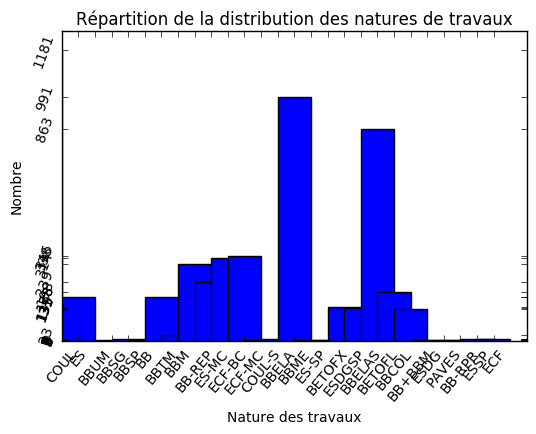

In [125]:
# définition de x
plt.yticks(y, rotation='70')
plt.xticks(pos, nature, rotation=50)
plt.bar(pos, y , align='center',width=2, alpha=1)

plt.axis([1, 29, 0,1260])

# Noms des axes et de la figure
plt.xlabel('Nature des travaux')
plt.ylabel('Nombre')
plt.title('Répartition de la distribution des natures de travaux')
plt.show()

### Visualisons le nombre et l’épaisseur moyenne des travaux par année

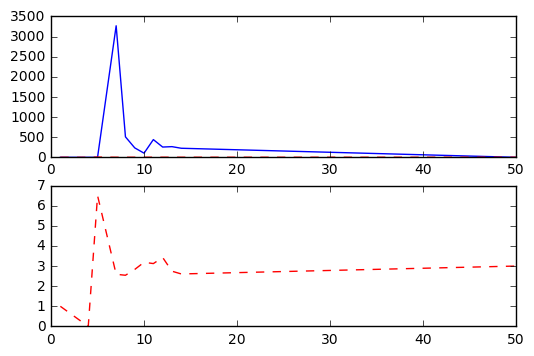

In [126]:
# définition de x
x=list(data_travaux.index)

# définition de y
y_size=list(data_travaux.entityid['size'].values)
y_epaisseur_moy=list(data_travaux.epaisseurdernierstravaux['mean'].values)

#plot

#subplot 1: nombre et épaisseur moyenne des travaux par an
plt.figure(1)
plt.subplot(211)
plt.plot(x, y_size, 'b', x, y_epaisseur_moy, 'r--')

#subplot 2: épaisseur moyenne des travaux par an
plt.subplot(212)
plt.plot(x, y_epaisseur_moy, 'r--')
plt.show()